# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">Buscaremos criar um modelo que permita realizar a previsão de renda de eventuais clientes entrantes. Para isto, faremos uso de uma base com 15 mil informações, onde separaremos uma parte da base para teste e outra parte para treino, visando ajustar o modelo aos dados já conhecidos. Trabalharemos criando mais de um modelo e a partir de análises objetivas, como R-quadrado e afins, iremos selecionar o modelo que melhor se ajusta aos dados e traz a previsão de renda mais adequada às nossas necessidades.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">A base possui 15 mil informações, dispostas em 15 variáveis distintas. Iremos, inicialmente, identificar quais colunas são relevantes e quais não e adaptar nossa base de dados às nossas necessidades. Após isto, faremos um estudo dos dados em branco/faltantes e o tratamento mais pertinente a cada um dos casos observados</span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data referência                                    | object       |
| id_cliente              |  Id do cliente                                      | int64        |
| sexo                    |  Sexo do cliente                                    | object       |
| posse_de_veiculo        |  Cliente possui veículo?                            | bool         |
| posse_de_imovel         |  Cliente possui imóvel?                             | bool         |
| qtd_filhos              |  Quantidade de filhos do cliente                    | int64        |
| tipo_renda              |  Profissão                                          | object       |
| educacao                |  Nível de ensino                                    | object       |
| estado_civil            |  Estado civil do cliente                            | object       |
| tipo_residencia         |  Tipo de residência do cliente                      | object       |
| idade                   |  Idade do cliente                                   | int64        |
| tempo_emprego           |  Tempo de emprego                                   | float64      |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência do cliente     | float64      |
| renda                   |  Renda mensal do cliente                            | float64      |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [4]:
renda.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


NameError: name 'ProfileReport' is not defined

In [ ]:
prof.to_file('./output/renda_analisys.html')

In [ ]:
renda.describe()

In [ ]:
# Iremos fazer uma avaliação da estabilidade das variáveis

AttributeError: 'str' object has no attribute 'strftime'

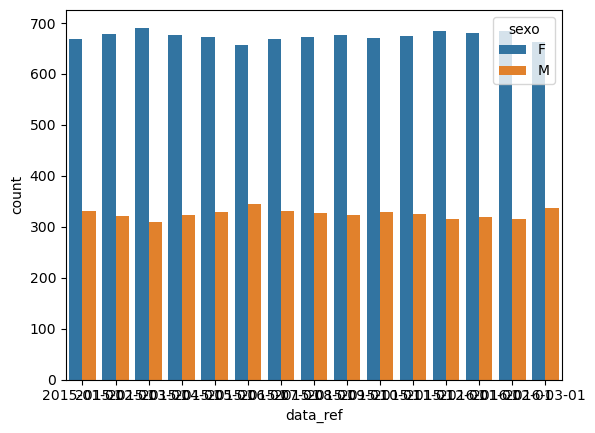

In [6]:
ax = sns.countplot(x='data_ref', hue='sexo', data=renda)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())), rotation=90)
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# Análise da variável 'sexo'

In [ ]:
renda['sexo'].value_counts().sort_index().plot.bar()

In [ ]:
renda['sexo'].value_counts()

In [ ]:
#Análise da variável 'posse_de_veiculo'

<Axes: xlabel='posse_de_veiculo'>

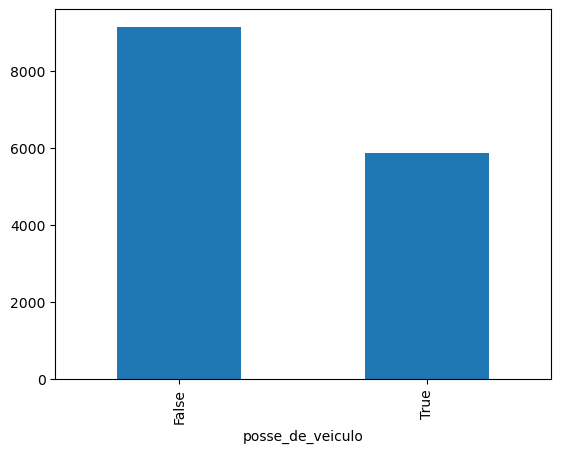

In [7]:
renda['posse_de_veiculo'].value_counts().sort_index().plot.bar()

In [8]:
renda[renda['posse_de_veiculo'] == False]['posse_de_veiculo'].value_counts()

posse_de_veiculo
False    9140
Name: count, dtype: int64

In [9]:
renda[renda['posse_de_veiculo'] == False]['posse_de_veiculo'].value_counts() / 15000 * 100

posse_de_veiculo
False    60.933333
Name: count, dtype: float64

In [10]:
# 60,93% da base não possui veículo

In [11]:
 renda[renda['posse_de_veiculo'] == True]['posse_de_veiculo'].value_counts() / 15000 * 100

posse_de_veiculo
True    39.066667
Name: count, dtype: float64

In [12]:
# 39,07% da base possui veículo

In [13]:
# Análise da variável 'posse_de_imovel'

<Axes: xlabel='posse_de_imovel'>

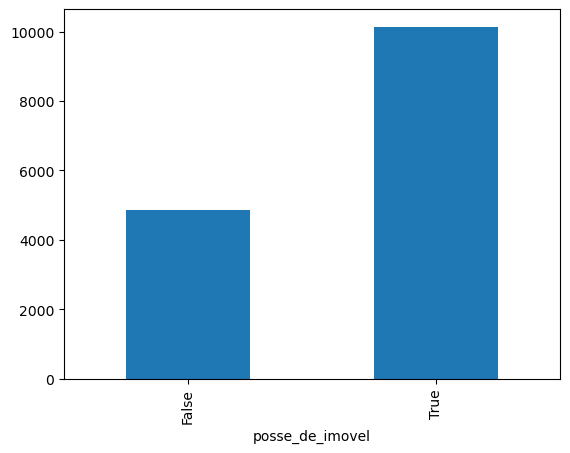

In [14]:
renda['posse_de_imovel'].value_counts().sort_index().plot.bar()

In [15]:
renda[renda['posse_de_imovel'] == False]['posse_de_imovel'].value_counts()

posse_de_imovel
False    4857
Name: count, dtype: int64

In [16]:
renda[renda['posse_de_imovel'] == False]['posse_de_imovel'].value_counts() / 15000 * 100

posse_de_imovel
False    32.38
Name: count, dtype: float64

In [17]:
renda[renda['posse_de_imovel'] == True]['posse_de_imovel'].value_counts()

posse_de_imovel
True    10143
Name: count, dtype: int64

In [18]:
# 32,38% da base não possui imóvel

In [19]:
renda[renda['posse_de_imovel'] == True]['posse_de_imovel'].value_counts() / 15000 * 100

posse_de_imovel
True    67.62
Name: count, dtype: float64

In [20]:
# 67,62% da base possui veículo, totalizando 10.143 clientes.

In [21]:
# Análise da variável 'qtd_filhos'

<Axes: xlabel='qtd_filhos'>

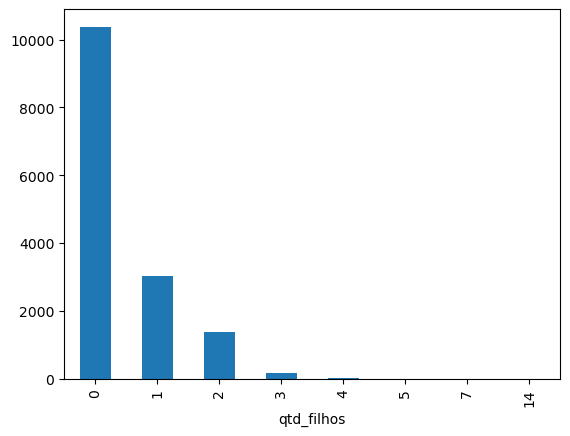

In [22]:
renda['qtd_filhos'].value_counts().sort_index().plot.bar()

In [23]:
renda[renda['qtd_filhos'] == 0]['qtd_filhos'].value_counts()

qtd_filhos
0    10376
Name: count, dtype: int64

In [24]:
renda[renda['qtd_filhos'] == 0]['qtd_filhos'].value_counts() / 15000 * 100

qtd_filhos
0    69.173333
Name: count, dtype: float64

In [25]:
# Quase 70% da base, 10.376 clientes não possuem filhos.

In [26]:
renda[renda['qtd_filhos'] == 14]['qtd_filhos'].value_counts()

qtd_filhos
14    2
Name: count, dtype: int64

In [27]:
# 2 clientes possuem 14 filhos, o que pode indicar um casal presente na base, mas ainda sim um outlier que pode ser interessante retirar.

In [28]:
# Análise da variável 'tipo_renda'

<Axes: xlabel='tipo_renda'>

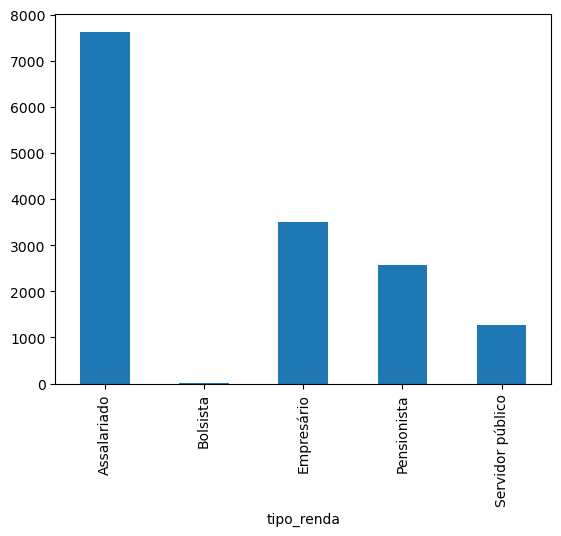

In [29]:
renda['tipo_renda'].value_counts().sort_index().plot.bar()

In [30]:
renda[renda['tipo_renda'] == 'Assalariado']['tipo_renda'].value_counts()

tipo_renda
Assalariado    7633
Name: count, dtype: int64

In [31]:
# 7633 clientes são assalariados, parte mais significativa da base.

In [32]:
renda[renda['tipo_renda'] == 'Bolsista']['tipo_renda'].value_counts()

tipo_renda
Bolsista    9
Name: count, dtype: int64

In [33]:
# Apenas 9 clientes são bolsistas

In [34]:
# Análise da variável 'educacao'

<Axes: xlabel='educacao'>

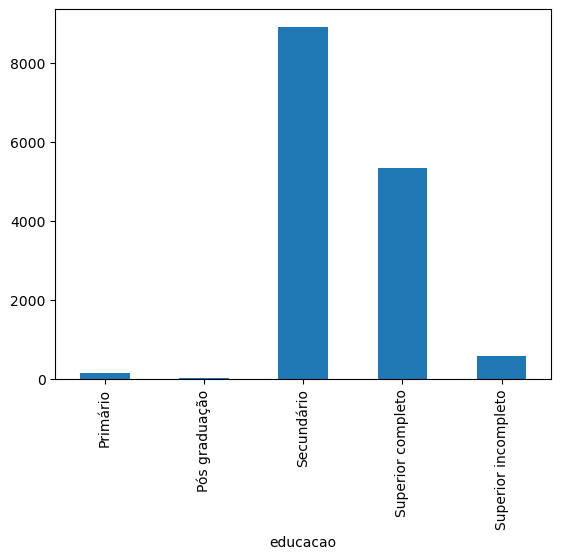

In [35]:
renda['educacao'].value_counts().sort_index().plot.bar()

In [36]:
renda[renda['educacao'] == 'Secundário']['educacao'].value_counts()

educacao
Secundário    8895
Name: count, dtype: int64

In [37]:
renda[renda['educacao'] == 'Secundário']['educacao'].value_counts() / 15000 * 100

educacao
Secundário    59.3
Name: count, dtype: float64

In [38]:
renda[renda['educacao'] == 'Superior completo']['educacao'].value_counts()

educacao
Superior completo    5335
Name: count, dtype: int64

In [39]:
renda[renda['educacao'] == 'Superior completo']['educacao'].value_counts() / 15000 * 100

educacao
Superior completo    35.566667
Name: count, dtype: float64

In [40]:
59.3 + 35.57

94.87

In [41]:
# Se somados, superior completo e secundário representam quase 95% da base quando estamos falando de nível educacional.

In [42]:
# Análise da variável 'estado_civil'

<Axes: xlabel='estado_civil'>

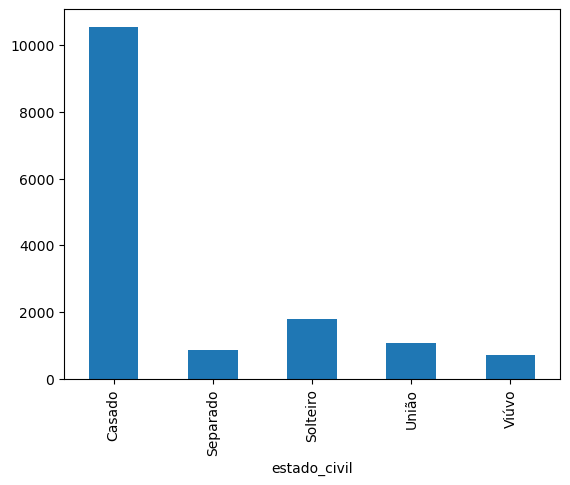

In [43]:
renda['estado_civil'].value_counts().sort_index().plot.bar()

In [44]:
renda[renda['estado_civil'] == 'Casado']['estado_civil'].value_counts()

estado_civil
Casado    10534
Name: count, dtype: int64

In [45]:
renda[renda['estado_civil'] == 'Casado']['estado_civil'].value_counts() / 15000 * 100

estado_civil
Casado    70.226667
Name: count, dtype: float64

In [46]:
# Cerca de 70% da base, 10534 clientes, são casados.

In [47]:
# Análise da variável 'tipo_residencia'

<Axes: xlabel='tipo_residencia'>

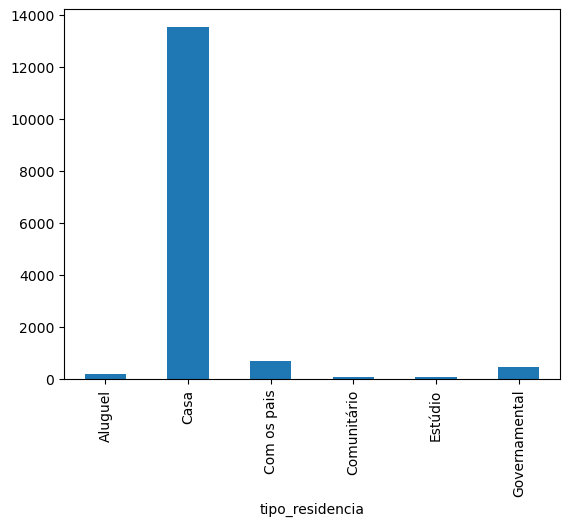

In [48]:
renda['tipo_residencia'].value_counts().sort_index().plot.bar()

In [49]:
renda[renda['tipo_residencia'] == 'Casa']['tipo_residencia'].value_counts()

tipo_residencia
Casa    13532
Name: count, dtype: int64

In [50]:
renda[renda['tipo_residencia'] == 'Casa']['tipo_residencia'].value_counts() / 15000 * 100

tipo_residencia
Casa    90.213333
Name: count, dtype: float64

In [51]:
# 90% dos clientes moram em uma casa. Entretanto, as demais classes parecem poder comportar também este tipo de residência, o que torna esta variável
# imprecisa para fins de análise.

In [52]:
# Análise da variável 'idade'

<Axes: xlabel='idade'>

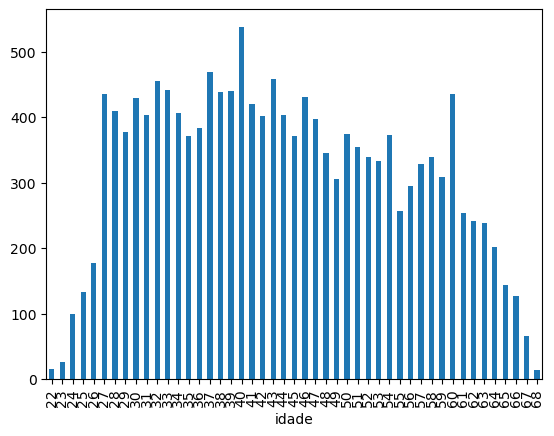

In [53]:
renda['idade'].value_counts().sort_index().plot.bar()

In [54]:
renda['idade'].mean()

43.882333333333335

In [55]:
# A média de idade dos clientes é 44 anos.

<Axes: ylabel='Frequency'>

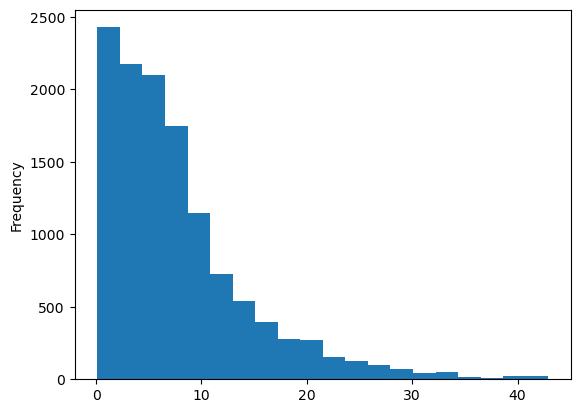

In [56]:
renda['tempo_emprego'].plot.hist(bins = 20)

In [57]:
renda['tempo_emprego'].mean()

7.722634652121815

In [58]:
# A média de tempo de emprego dos clientes é 7.7 anos.

<Axes: ylabel='Frequency'>

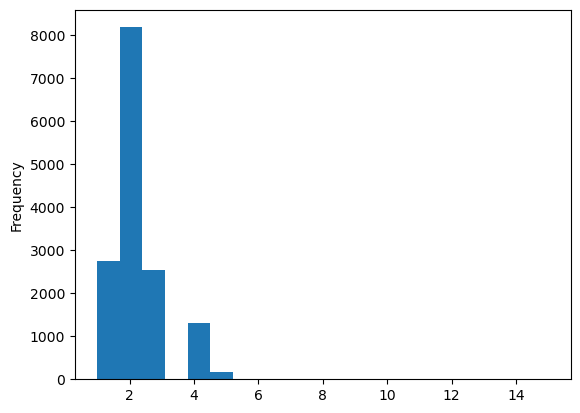

In [59]:
renda['qt_pessoas_residencia'].plot.hist(bins = 20)

In [60]:
renda['qt_pessoas_residencia'].mean()

2.2064

In [61]:
# Em média, os clientes da base moram em uma casa com 2.2 pessoas.

<Axes: ylabel='Frequency'>

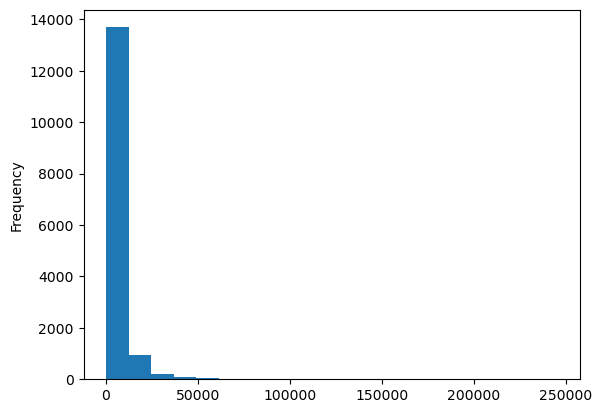

In [62]:
renda['renda'].plot.hist(bins = 20)

<Axes: ylabel='renda'>

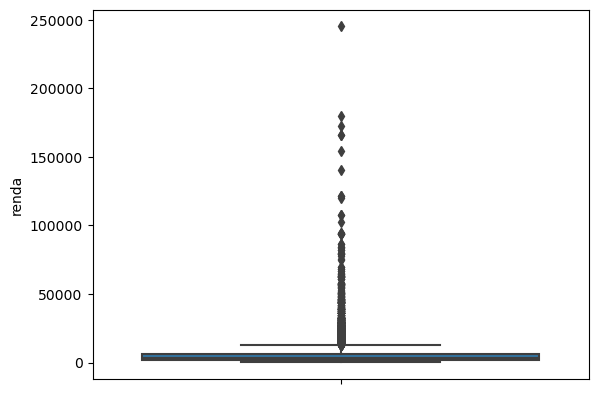

In [63]:
sns.boxplot(y='renda', data=renda)

In [64]:
renda['renda'].mean()

5697.287056666667

In [65]:
# A renda média dos clientes é R$ 5.697

In [66]:
renda['renda'].max()

245141.67

In [67]:
# O cliente com maior renda possui R$ 245.141 de renda mensal.

In [68]:
renda[renda['renda'] < 245141.67]['renda'].mean()

5681.323033535569

In [69]:
# Se retirarmos este cliente da base e recalcularmos a média, esta cai para R$ 5.681.

<span style="color:red">De acordo com a análise realizada, temos 15 variáveis, sendo 7 numéricas, 6 categóricas e 2 booleanos; 15.000 informações e 2573 células em branco, representando 1.1% da base. Estas informações em branco estão todas dispostas na variável "tempo_emprego", o que pode indicar pessoas desempregadas, uma vez que possuímos informações completas em todas outras variáveis.
Algumas informações adicionais que merecem destaque:
-67.5% da base são de pessoas do sexo feminino;
-67.6% da base são de pessoas que possuem imóvel;
-69.2% da base não possui filhos e 2 clientes possuem 14 filhos, o que pode indicar um outlier a ser removido.
-90.2% da base são de pessoas que moram em uma casa. Esta variável parece conter algumas informações que se sobrepõem. Por exemplo: 90% indicou o tipo de residência como casa; 4.5% o tipo de residência "com os pais"; 1.3% o tipo de residência "aluguel". Desta forma, por não confiar na qualidade do campo como entrega de informação de qualidade e confiável, irei optar por não utilizar a variável "tipo_residência" durante as análises.</span>


### Entendimento dos dados - Bivariadas




<span style="color:red">ESCREVER AQUI</span>


<Axes: xlabel='sexo', ylabel='renda'>

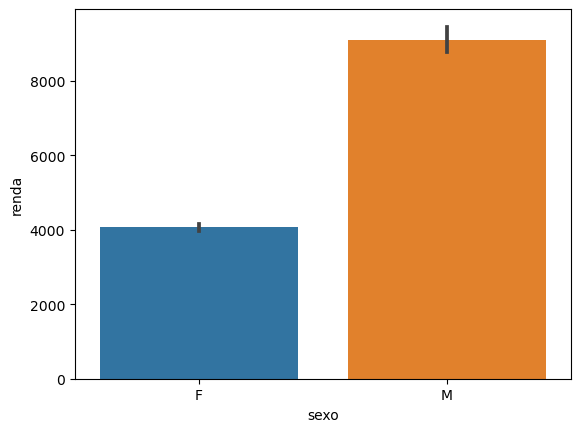

In [70]:
sns.barplot(x='sexo', y='renda', data=renda, estimator=np.mean)

In [71]:
# Como conclusão, podemos observar que o homem ganha mais que a mulher e, além disto, a distribuição de renda para homens é mais volátil.

In [72]:
# Faremos uma avaliação ainda da renda em cada um dos grupos. Para tanto, como estamos trabalhando com dados de renda que vão de 0 até cerca de 250.000,
# conforme visto, iremos utilizar um tratamento na coluna de renda, criando uma nova de log_renda, onde iremos trazer esses valores para a escala logari-
# tmica, de forma a ficar mais entendível a análise gráfica. Segue exemplo abaixo, fazendo a análise com a renda e com o logaritmo aplicado à renda.

In [73]:
log_renda = np.log(renda['renda'])

In [74]:
log_renda

0        8.994711
1        7.524102
2        7.720413
3        8.794942
4        8.775854
           ...   
14995    8.986019
14996    9.219642
14997    6.404931
14998    8.117393
14999    7.057028
Name: renda, Length: 15000, dtype: float64

In [75]:
renda['log_renda'] = log_renda

In [76]:
renda

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,8.994711
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,7.524102
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,7.720413
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,8.794942
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,8.775854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58,8.986019
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45,9.219642
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82,6.404931
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27,8.117393


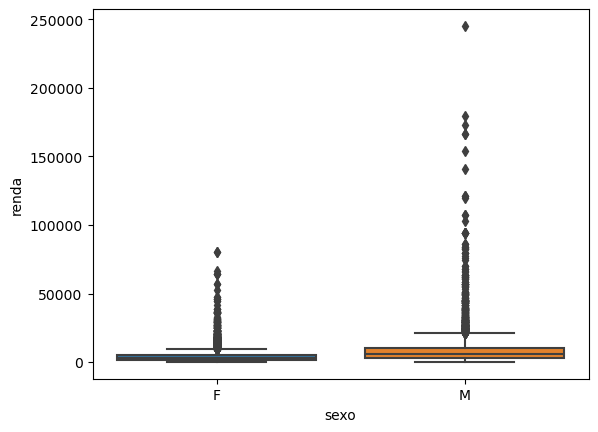

In [77]:
ax = sns.boxplot(x='sexo', y='renda', data=renda)

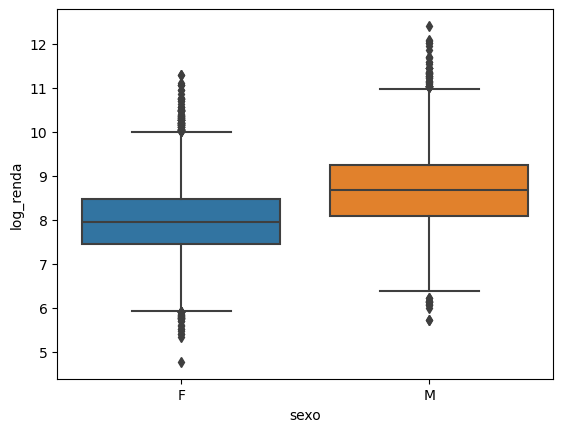

In [78]:
ax = sns.boxplot(x='sexo', y='log_renda', data=renda)

In [79]:
# Conforme visto acima, o visual se torna muito mais percepetível, indicando tendências, se observado na escala logaritmica.

<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

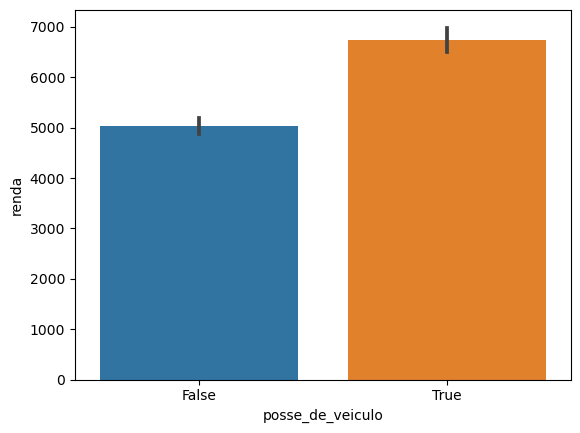

In [80]:
sns.barplot(x='posse_de_veiculo', y='renda', data=renda, estimator=np.mean)

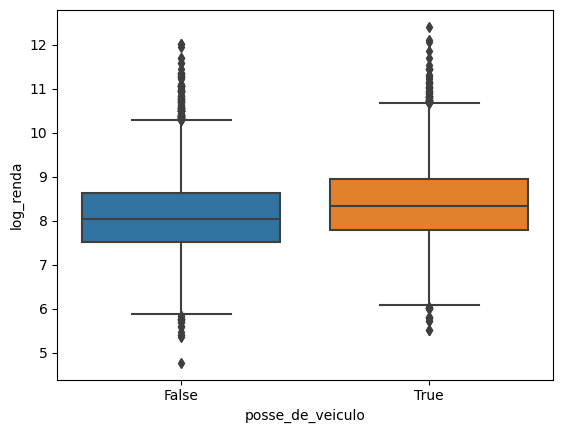

In [81]:
ax = sns.boxplot(x='posse_de_veiculo', y='log_renda', data=renda)

In [82]:
# Em média, clientes que possuem veículo, possuem renda maior.

<Axes: xlabel='posse_de_imovel', ylabel='renda'>

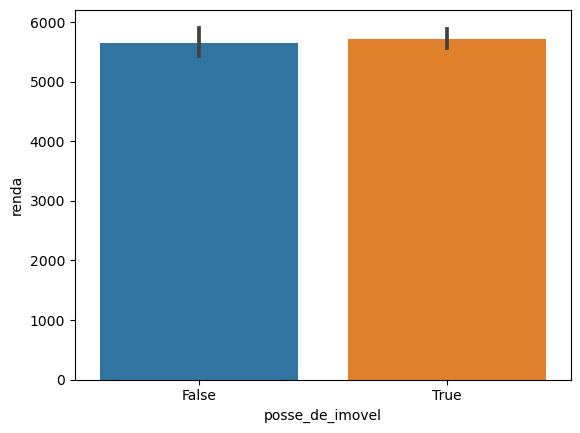

In [83]:
sns.barplot(x='posse_de_imovel', y='renda', data=renda, estimator=np.mean)

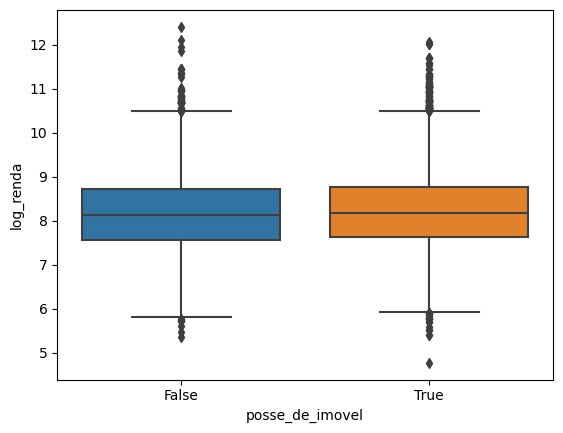

In [84]:
ax = sns.boxplot(x='posse_de_imovel', y='log_renda', data=renda)

In [85]:
# Para posse de imóvel, parece não haver diferenças no nível médio de renda.

<Axes: xlabel='tipo_renda', ylabel='renda'>

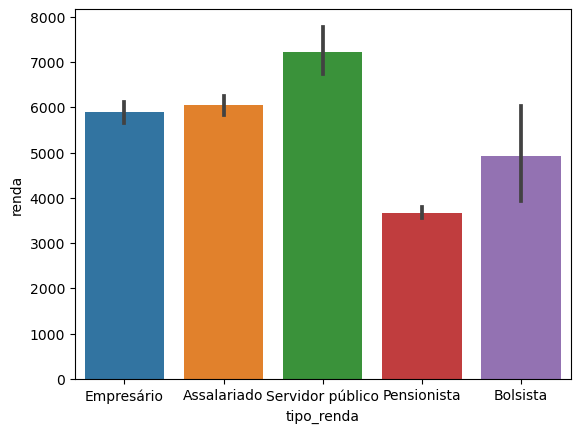

In [86]:
sns.barplot(x='tipo_renda', y='renda', data=renda, estimator=np.mean)

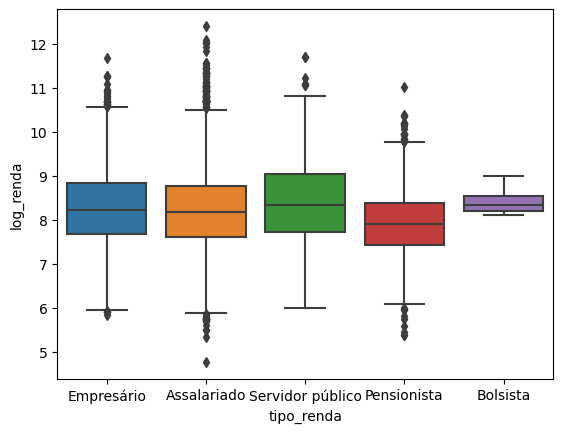

In [87]:
ax = sns.boxplot(x='tipo_renda', y='log_renda', data=renda)

In [88]:
# Para o tipo de renda, observamos que, a categoria de servidor público possui a maior renda média, enquanto pensionista a menor.

<Axes: xlabel='qtd_filhos', ylabel='renda'>

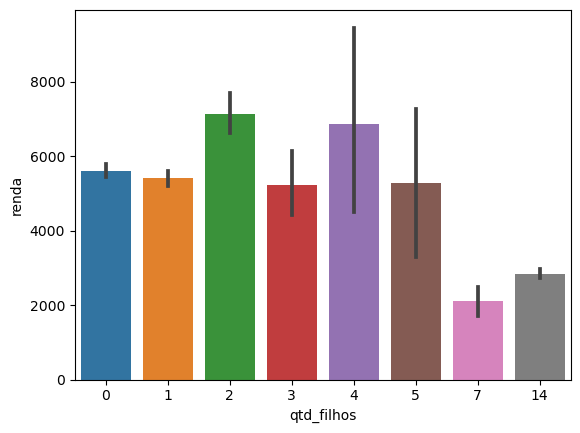

In [89]:
sns.barplot(x='qtd_filhos', y='renda', data=renda, estimator=np.mean)

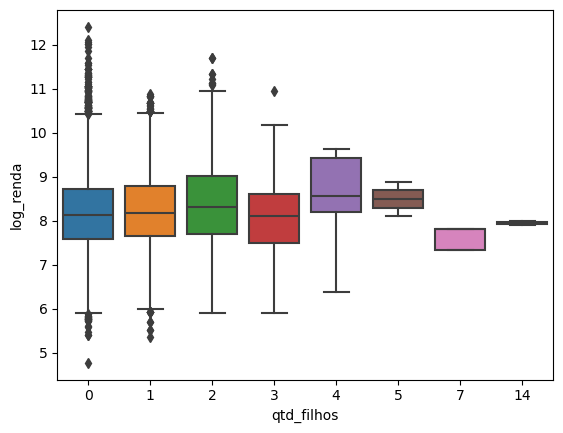

In [90]:
ax = sns.boxplot(x='qtd_filhos', y='log_renda', data=renda)

In [91]:
# Para quantidade de filhos, observando a renda média, não conseguimos observar nenhum padrão relevante.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Secundário'),
  Text(1, 0, 'Superior completo'),
  Text(2, 0, 'Superior incompleto'),
  Text(3, 0, 'Primário'),
  Text(4, 0, 'Pós graduação')])

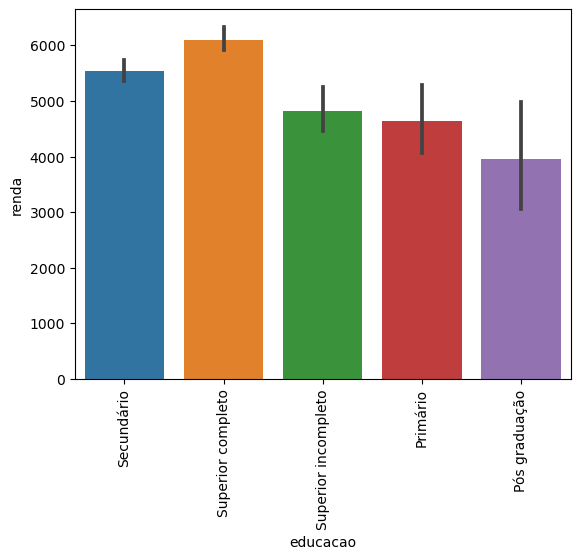

In [92]:
sns.barplot(x='educacao', y='renda', data=renda, estimator=np.mean)
plt.xticks(rotation=90)

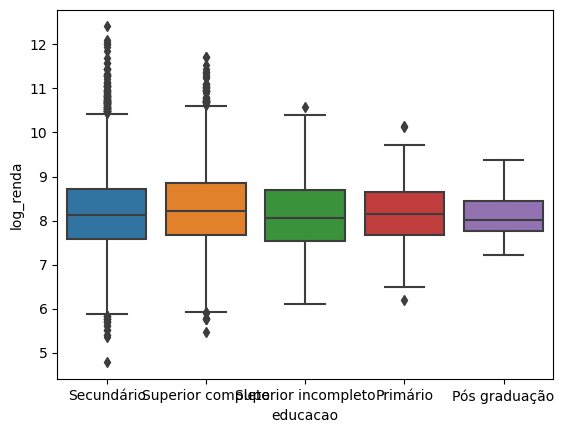

In [93]:
ax = sns.boxplot(x='educacao', y='log_renda', data=renda)

In [94]:
# Ao analisar o nível educacional, observamos que os clientes com superior completo possuem renda média maior e clientes com pós-graduação a menor renda
# média, apesar de aparentar apresentar alta volatilidade.

<Axes: xlabel='estado_civil', ylabel='renda'>

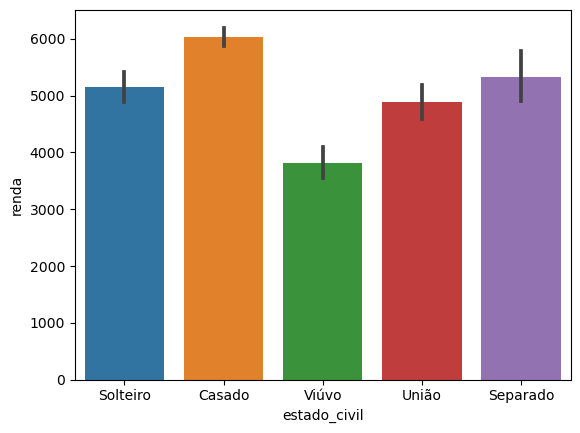

In [95]:
sns.barplot(x='estado_civil', y='renda', data=renda, estimator=np.mean)

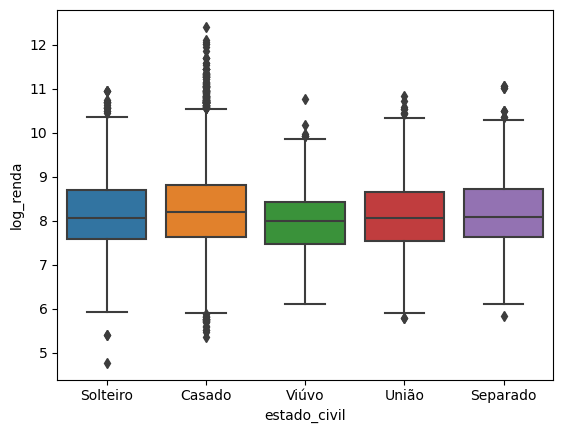

In [96]:
ax = sns.boxplot(x='estado_civil', y='log_renda', data=renda)

In [97]:
# Podemos observar que clientes casados possuem renda média maior que os clientes dos demais grupos de estado civil,

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Casa'),
  Text(1, 0, 'Governamental'),
  Text(2, 0, 'Com os pais'),
  Text(3, 0, 'Aluguel'),
  Text(4, 0, 'Estúdio'),
  Text(5, 0, 'Comunitário')])

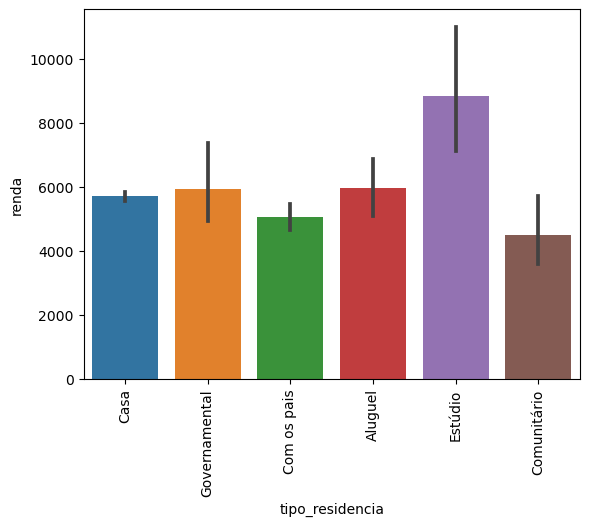

In [98]:
sns.barplot(x='tipo_residencia', y='renda', data=renda, estimator=np.mean)
plt.xticks(rotation=90)

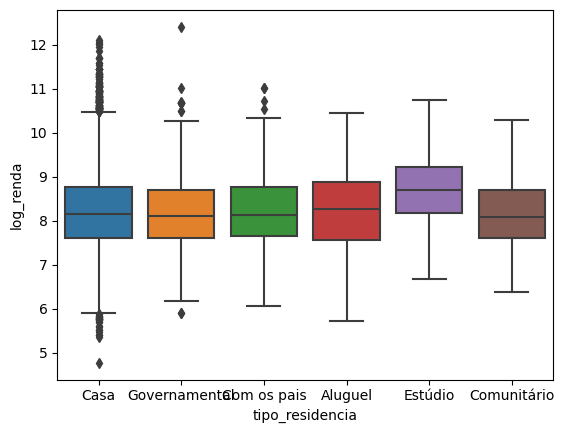

In [99]:
ax = sns.boxplot(x='tipo_residencia', y='log_renda', data=renda)

In [100]:
# Para análise do tipo de residência, vemos que a renda média de pessoas que moram em estúdio é a maior.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

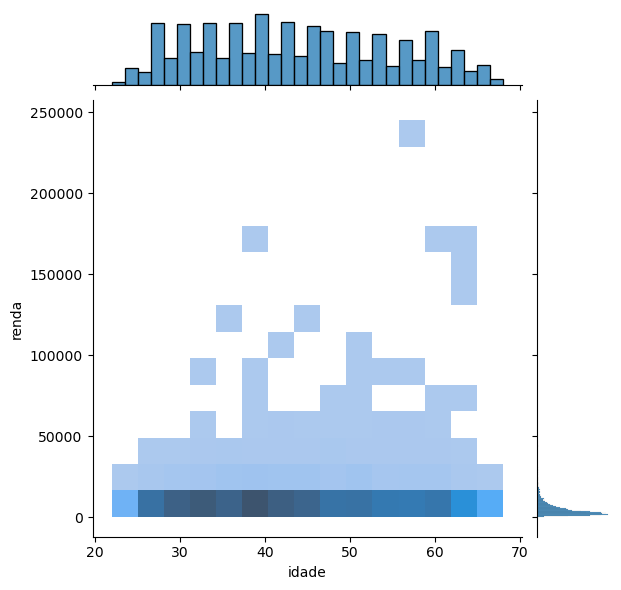

In [101]:
sns.jointplot(x='idade'
              ,y='renda'
              ,data=renda
              ,kind="hist"
              ,bins=[15, 15])

In [102]:
# Apesar de a análise bivariada entre idade e renda pouco revele, podemos observar uma leve tendência de aumento da renda para idades acima de 30 e 
# abaixo de 65 anos. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

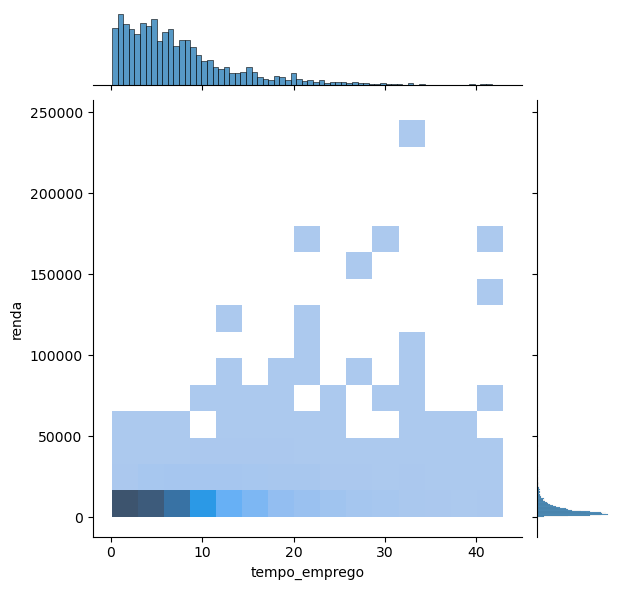

In [103]:
sns.jointplot(x='tempo_emprego'
              ,y='renda'
              ,data=renda
              ,kind="hist"
              ,bins=[15, 15])

In [104]:
# Da mesma forma que a análise acima, observamos um aumento da renda com o aumento do tempo de emprego.

<Axes: xlabel='qt_pessoas_residencia', ylabel='renda'>

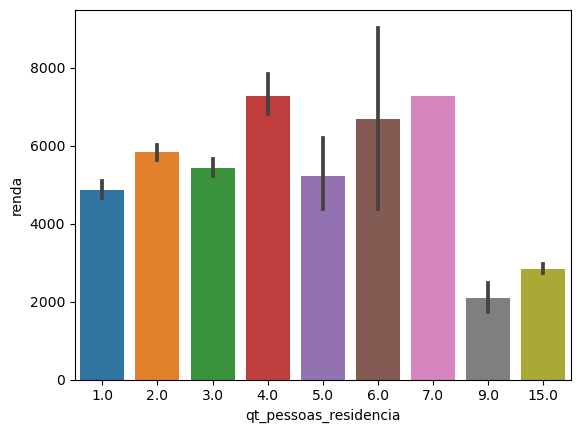

In [105]:
sns.barplot(x='qt_pessoas_residencia', y='renda', data=renda, estimator=np.mean)

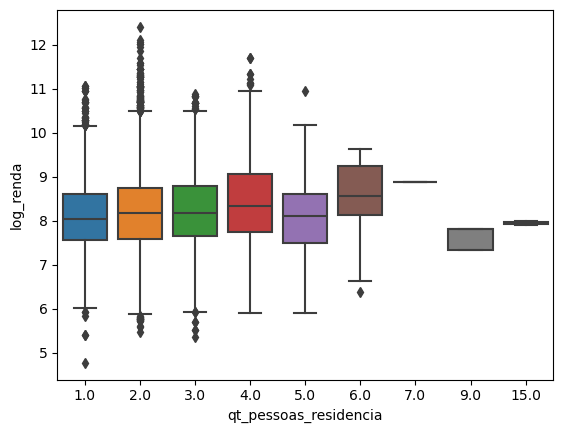

In [106]:
ax = sns.boxplot(x='qt_pessoas_residencia', y='log_renda', data=renda)

In [107]:
# Para quantidade de pessoas na residência, podemos afirmar que clientes que vivem com 9 ou mais pessoas na mesma residência, possuem renda média menor
# que os demais grupos.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [108]:
#Retirar a tipo_residencia
#Tempo emprego preencher como zero ou remover.
#Formatar dados em bool e int e float para comportar modelos de árvore de decisão e afins.

In [109]:
# Seleção de Dados:
# Retirar: unnamed, data_ref, id_cliente
# Iremos retirar a variável tipo_residencia por causar confusão nas suas categorias de definição.

In [110]:
# Por não serem significantes à nossa análise, irei retirar as variáveis ' Unnamed: 0', 'data_ref' e 'id_cliente'.
# Iremos retirar, também, a variável tipo_residencia por causar confusão nas suas categorias de definição.
renda_filtrado = renda.drop(['data_ref', 'id_cliente', 'Unnamed: 0', 'tipo_residencia'], axis=1)
renda_filtrado

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,F,False,True,0,Empresário,Secundário,Solteiro,26,6.602740,1.0,8060.34,8.994711
1,M,True,True,0,Assalariado,Superior completo,Casado,28,7.183562,2.0,1852.15,7.524102
2,F,True,True,0,Empresário,Superior completo,Casado,35,0.838356,2.0,2253.89,7.720413
3,F,False,True,1,Servidor público,Superior completo,Casado,30,4.846575,3.0,6600.77,8.794942
4,M,True,False,0,Assalariado,Secundário,Solteiro,33,4.293151,1.0,6475.97,8.775854
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,F,False,True,0,Empresário,Secundário,Solteiro,48,13.887671,1.0,7990.58,8.986019
14996,F,False,True,0,Pensionista,Superior completo,Solteiro,57,NaN,1.0,10093.45,9.219642
14997,F,True,True,0,Assalariado,Superior completo,Casado,45,7.832877,2.0,604.82,6.404931
14998,M,True,False,0,Empresário,Superior completo,Casado,36,4.298630,2.0,3352.27,8.117393


In [111]:
# Limpeza

In [112]:
# Inicialmente, utilizaremos o método isna para identificar dados faltantes. Acima, já havíamos descoberto que 100% desses dados missing estão presentes
# na variável tempo_emprego. Apenas para efeitos de confirmação, faremos outra verificação.
renda_filtrado.isna().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
log_renda                   0
dtype: int64

In [113]:
2573/15000*100

17.153333333333336

In [114]:
# 17.15% da variável tempo_emprego possui dados em branco. Como identificamos apenas nesta variável dados 

In [115]:
# Como existe apenas uma variável com ausência de valores preenchidos, iremos verificar se essa ausência de informação não diz respeito a clientes
# que não estão trabalhando, como pensionistas, por exemplo.

In [116]:
renda_zeros = renda_filtrado[renda_filtrado.tempo_emprego.isna()]
renda_zeros

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
11,F,False,True,0,Pensionista,Secundário,Casado,65,NaN,2.0,1685.51,7.429823
12,F,False,True,0,Pensionista,Secundário,Viúvo,60,NaN,1.0,6343.52,8.755189
21,F,True,True,0,Pensionista,Superior incompleto,Casado,58,NaN,2.0,1649.37,7.408149
22,F,False,True,0,Pensionista,Secundário,Viúvo,61,NaN,1.0,4715.57,8.458625
23,F,True,True,0,Pensionista,Secundário,Casado,59,NaN,2.0,799.18,6.683586
...,...,...,...,...,...,...,...,...,...,...,...,...
14979,F,True,True,1,Pensionista,Secundário,Casado,56,NaN,3.0,4672.65,8.449482
14984,F,True,True,0,Pensionista,Secundário,Casado,55,NaN,2.0,1235.34,7.119102
14986,F,False,False,0,Pensionista,Secundário,Casado,59,NaN,2.0,2410.18,7.787457
14991,M,False,True,0,Pensionista,Secundário,Casado,62,NaN,2.0,5153.15,8.547363


In [117]:
renda_zeros['tipo_renda'].value_counts()

tipo_renda
Pensionista    2573
Name: count, dtype: int64

In [118]:
# Conforme suspeitávamos, a totalidade dessas informações são de clientes que não estão trabalhando. Desta forma, para não retirarmos todos pensionistas
# da base e por entender que a variável é relevante à nossa análise, iremos preencher as informações em branco com 0.

In [119]:
renda_filtrado['tempo_emprego'] = renda_filtrado['tempo_emprego'].fillna(0)

In [120]:
# Verificamos para nos certificarmos de que as informações foram preenchidas corretamente.

In [121]:
renda_filtrado.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
log_renda                0
dtype: int64

In [122]:
# As etapas de Construção e Integração iremos pular por não haver necessidade de atuarmos nelas.

In [123]:
# Formatação

In [124]:
# As colunas em formatos não aceitáveis para trabalhar com modelos de árvore de decisão e machine learning, iremos transformar em dummies.
# São elas todas as colunas com formato object.

In [125]:
renda_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   idade                  15000 non-null  int64  
 8   tempo_emprego          15000 non-null  float64
 9   qt_pessoas_residencia  15000 non-null  float64
 10  renda                  15000 non-null  float64
 11  log_renda              15000 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 1.2+ MB


In [126]:
renda_preparada = pd.get_dummies(renda_filtrado, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil'], drop_first=True)
renda_preparada.head(20)

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda,sexo_M,tipo_renda_Bolsista,...,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Pós graduação,educacao_Secundário,educacao_Superior completo,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
0,False,True,0,26,6.602740,1.0,8060.34,8.994711,False,False,...,False,False,False,True,False,False,False,True,False,False
1,True,True,0,28,7.183562,2.0,1852.15,7.524102,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,True,0,35,0.838356,2.0,2253.89,7.720413,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,1,30,4.846575,3.0,6600.77,8.794942,False,False,...,False,True,False,False,True,False,False,False,False,False
4,True,False,0,33,4.293151,1.0,6475.97,8.775854,True,False,...,False,False,False,True,False,False,False,True,False,False
5,False,True,0,39,4.345205,2.0,1445.87,7.276466,False,False,...,False,False,False,False,True,False,False,False,False,False
6,False,True,0,55,6.378082,1.0,1726.03,7.453579,False,False,...,False,False,False,False,True,False,False,False,False,True
7,False,True,0,36,3.104110,2.0,2515.98,7.830418,False,False,...,False,False,False,True,False,False,False,False,False,False
8,False,True,0,50,18.605479,2.0,3420.34,8.137495,False,False,...,False,False,False,True,False,False,False,False,False,False
9,True,True,0,60,10.558904,2.0,12939.14,9.468012,True,False,...,False,False,False,False,True,False,False,False,False,False


In [127]:
renda_preparada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   posse_de_veiculo              15000 non-null  bool   
 1   posse_de_imovel               15000 non-null  bool   
 2   qtd_filhos                    15000 non-null  int64  
 3   idade                         15000 non-null  int64  
 4   tempo_emprego                 15000 non-null  float64
 5   qt_pessoas_residencia         15000 non-null  float64
 6   renda                         15000 non-null  float64
 7   log_renda                     15000 non-null  float64
 8   sexo_M                        15000 non-null  bool   
 9   tipo_renda_Bolsista           15000 non-null  bool   
 10  tipo_renda_Empresário         15000 non-null  bool   
 11  tipo_renda_Pensionista        15000 non-null  bool   
 12  tipo_renda_Servidor público   15000 non-null  bool   
 13  e

In [128]:
# Iremos nos certificar de que não estamos tendo dados em duplicidade, removendo as duplicadas.

renda_preparada_2 = renda_preparada.drop_duplicates()

In [129]:
renda_preparada_2.shape

(10447, 21)

In [130]:
# Iremos renomear as colunas que possuem espaço no nome.
renda_preparada_2 = renda_preparada_2.rename(columns={'tipo_renda_Servidor público': 'tipo_renda_Servidor_público', 'educacao_Pós graduação': 'educacao_Pós_graduação', 'educacao_Superior completo': 'educacao_Superior_completo', 'educacao_Superior incompleto': 'educacao_Superior_incompleto'})

In [131]:
# Aqui iremos transformar todas variáveis booleanas em inteiros.
renda_preparada_2['posse_de_veiculo'] = renda_preparada_2['posse_de_veiculo'].astype(int)
renda_preparada_2['posse_de_imovel'] = renda_preparada_2['posse_de_imovel'].astype(int)
renda_preparada_2['sexo_M'] = renda_preparada_2['sexo_M'].astype(int)
renda_preparada_2['tipo_renda_Bolsista'] = renda_preparada_2['tipo_renda_Bolsista'].astype(int)
renda_preparada_2['tipo_renda_Empresário'] = renda_preparada_2['tipo_renda_Empresário'].astype(int)
renda_preparada_2['tipo_renda_Pensionista'] = renda_preparada_2['tipo_renda_Pensionista'].astype(int)
renda_preparada_2['tipo_renda_Servidor_público'] = renda_preparada_2['tipo_renda_Servidor_público'].astype(int)
renda_preparada_2['educacao_Pós_graduação'] = renda_preparada_2['educacao_Pós_graduação'].astype(int)
renda_preparada_2['educacao_Secundário'] = renda_preparada_2['educacao_Secundário'].astype(int)
renda_preparada_2['educacao_Superior_completo'] = renda_preparada_2['educacao_Superior_completo'].astype(int)
renda_preparada_2['educacao_Superior_incompleto'] = renda_preparada_2['educacao_Superior_incompleto'].astype(int)
renda_preparada_2['estado_civil_Separado'] = renda_preparada_2['estado_civil_Separado'].astype(int)
renda_preparada_2['estado_civil_Solteiro'] = renda_preparada_2['estado_civil_Solteiro'].astype(int)
renda_preparada_2['estado_civil_União'] = renda_preparada_2['estado_civil_União'].astype(int)
renda_preparada_2['estado_civil_Viúvo'] = renda_preparada_2['estado_civil_Viúvo'].astype(int)

In [132]:
renda_preparada_2

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda,sexo_M,tipo_renda_Bolsista,...,tipo_renda_Pensionista,tipo_renda_Servidor_público,educacao_Pós_graduação,educacao_Secundário,educacao_Superior_completo,educacao_Superior_incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
0,0,1,0,26,6.602740,1.0,8060.34,8.994711,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,28,7.183562,2.0,1852.15,7.524102,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,35,0.838356,2.0,2253.89,7.720413,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,30,4.846575,3.0,6600.77,8.794942,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1,0,0,33,4.293151,1.0,6475.97,8.775854,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0,0,1,33,1.041096,3.0,1918.14,7.559111,1,0,...,0,0,0,0,1,0,0,0,0,0
14996,0,1,0,57,0.000000,1.0,10093.45,9.219642,0,0,...,1,0,0,0,1,0,0,1,0,0
14997,1,1,0,45,7.832877,2.0,604.82,6.404931,0,0,...,0,0,0,0,1,0,0,0,0,0
14998,1,0,0,36,4.298630,2.0,3352.27,8.117393,1,0,...,0,0,0,0,1,0,0,0,0,0


In [133]:
# Dados ajustados ao padrão necessário. Desta forma, encerramos a etapa de Preparação dos Dados.

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">Como a variável resposta se trata de uma variável contínua, iremos trabalhar, necessariamente, com um modelo de regressão.</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


<Axes: xlabel='tempo_emprego', ylabel='renda'>

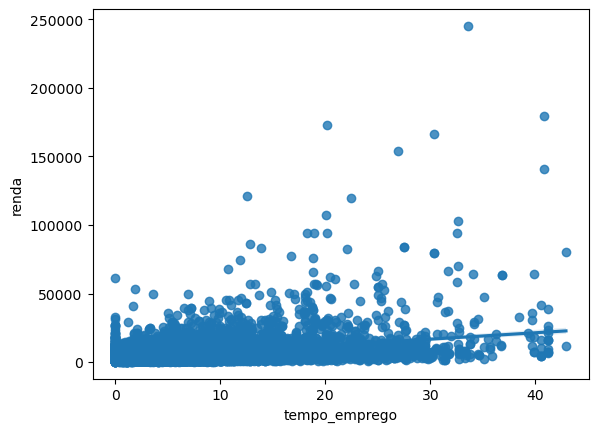

In [134]:
# Faremos um gráfico de dispersão apenas para ter uma ideia de análise descritiva e ingressarmos em seguida na construção do modelo.

# Gráfico de Dispersão

sns.regplot(y='renda', x='tempo_emprego', data=renda_preparada_2)

In [ ]:
renda_treina = renda_preparada_2[0:

In [ ]:
# Observamos a variância aumentando conforme nos movimentamos à direita do eixo das abscissas, indicando a correlação já observada entre tempo de emprego
# e renda.

In [136]:
results = smf.ols('renda ~ tempo_emprego + idade + sexo_M + tipo_renda_Servidor_público + tipo_renda_Bolsista + tipo_renda_Pensionista + tipo_renda_Empresário', renda_preparada_2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     507.3
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:10:11   Log-Likelihood:            -1.0771e+05
No. Observations:               10447   AIC:                         2.154e+05
Df Residuals:                   10439   BIC:                         2.155e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2298.2078    362.847     -6.334      0.000   -3009.457   -1586.958
tempo_emprego                 548.3040     12.403     44.209      0.000     523.992     572.616
idade                          40.4433      8.554      4.728      0.000      23.675      57.211
sexo_M                       6044.0307    156.746     38.559      0.000    5736.778    6351.284
tipo_renda_Servidor_público   281.9526    267.188      1.055      0.291    -241.786     805.691
tipo_renda_Bolsista          -511.3678   2752.066     -0.186      0.853   -5905.943    4883.207
tipo_renda_Pensionista       2711.7393    287.701      9.426      0.000    2147.790    3275.689
tipo_renda_Empresário         911.9347    179.441      5.082      0.000     560.196    1263.673
==============================================================================
Omnibus:                    15858.189   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13557044.010
Skew:                           9.216   Prob(JB):                         0.00
Kurtosis:                     178.514   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

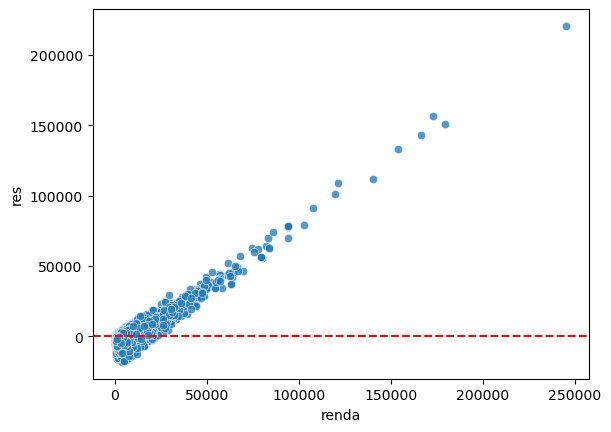

In [140]:
renda_preparada_2['res'] = results.resid
sns.scatterplot(x = 'renda', y = 'res', data = renda_preparada_2, alpha =.75)
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
# O modelo produziu um R-quadrado de 0.254, indicando que está prevendo 25% das variações de erros.
# Além disso, podemos observar um erro com clara tendência linear, conforme observado no gráfico acima.

In [ ]:
# As variáveis tipo_renda_bolsista e tipo_renda_Servidor_público por apresentarem p-values acima de 5% serão retiradas por não serem estatisticamente
# significantes.

# Além disso, iremos aplicar um log na variável resposta, de forma a melhorar nosso modelo.

In [164]:
results = smf.ols('np.log(renda) ~ tempo_emprego + idade + sexo_M + tipo_renda_Pensionista + tipo_renda_Empresário', renda_preparada_2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     775.4
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:48:38   Log-Likelihood:                -11336.
No. Observations:               10447   AIC:                         2.269e+04
Df Residuals:                   10439   BIC:                         2.275e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.2119      0.048    150.114      0.000       7.118       7.306
tempo_emprego              0.0608      0.001     50.198      0.000       0.058       0.063
idade                      0.0052      0.001      5.942      0.000       0.003       0.007
sexo_M                     0.8129      0.016     52.288      0.000       0.782       0.843
tipo_renda_Pensionista     0.2683      0.028      9.498      0.000       0.213       0.324
tipo_renda_Empresário      0.1478      0.017      8.520      0.000       0.114       0.182
qtd_filhos                 0.0135      0.021      0.653      0.514      -0.027       0.054
qt_pessoas_residencia      0.0105      0.017      0.618      0.536      -0.023       0.044
==============================================================================
Omnibus:                        0.509   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.484
Skew:                           0.014   Prob(JB):                        0.785
Kurtosis:                       3.017   Cond. No.                         332.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

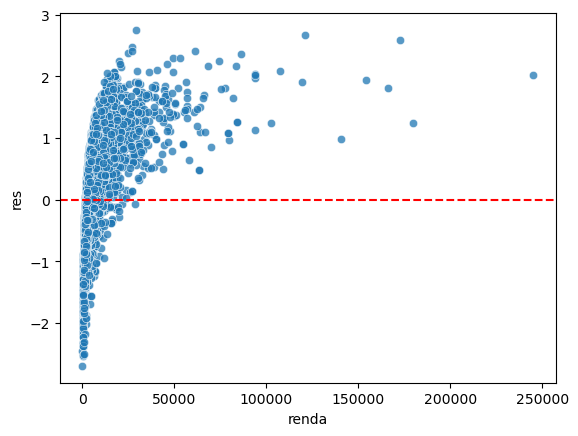

In [165]:
renda_preparada_2['res'] = results.resid
sns.scatterplot(x = 'renda', y = 'res', data = renda_preparada_2, alpha =.75)
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
# Conforme esperado, melhoramos o modelo, obtendo um R-quadrado de 0.342.

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


In [ ]:
# Existe um espaço para melhorar na métrica preditiva, principalmente no que diz respeito ao tratamento dos erros, uma vez que estes possuem uma clara
# tendência observada.

# Como próximos passos, iremos buscar melhorar nosso modelo de regressão, assim como adentrar a parte de implantação, onde iremos construir formas automa
# tizadas de obter os resultados desejados.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.